In [1]:
import pickle, os, torch
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder = 'results_sweep_smass_040122'
run = 'Sage_vlarge_all_4t_z0.0_quantile_raw_vculwx'
pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')    

In [3]:
lows=[]
pred = []
  
results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
ys=results['ys']+9
pred=results['pred']+9
config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))
data_p=config["data_params"]
print(config)

{'experiment': 'GraphMerge', 'group': 'sweep_smass', 'move': False, 'model': 'Sage', 'log': True, 'run_params': {'n_epochs': 250, 'n_trials': 1, 'batch_size': 512, 'val_epoch': 2, 'early_stopping': True, 'patience': 20, 'l1_lambda': 0.0, 'l2_lambda': 0.0, 'loss_func': 'L2', 'metrics': 'test_multi', 'performance_plot': 'SAM_base', 'shuffle': True, 'save': True, 'seed': False, 'num_workers': 4}, 'learn_params': {'learning_rate': 0.001, 'schedule': 'warmup_expcos', 'g_up': 1, 'g_down': 0.95, 'warmup': 4, 'period': 10, 'eta_min': 1e-05}, 'hyper_params': {'hidden_channels': 128, 'conv_layers': 5, 'conv_activation': 'relu', 'decode_activation': 'leakyrelu', 'decode_layers': 2, 'layernorm': True, 'agg': 'sum', 'variance': False, 'rho': 0, 'in_channels': 43, 'out_channels': 1}, 'data_params': {'case': 'vlarge_all_4t_z0.0_quantile_raw', 'targets': [0], 'split': 0.8, 'shuffle': 0}, 'experiment_name': 'lea0.001g_u1.7g_d0.95con5.0dec2.0hid128.0l1_0.0l2_0.0'}


In [4]:
# this is the correlated run
folder = 'results_final_Gauss4d_020222'
run='Sage_vlarge_all_4t_z0.0_quantile_raw_ppzquc_4_6'
pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')    
results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))
ys, pred = results['low_ys']+9, results['low_pred']+9
mstar_ys, mstar_pred = ys[:,0], pred[:,0]

In [5]:
datat=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.0_None/data.pkl'), 'rb'))
from torch_geometric.data import Data
data=[]
for d in datat:
    data.append(Data(x=d.x, edge_index=d.edge_index, edge_attr=d.edge_attr, y=d.y[0]))
testidx = pickle.load(open(osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphStorage/tvt_idx/test_idx.pkl'), 'rb'))

In [6]:
Mhfte = []
Mhftr = []
ystr = []
yste = []
test_data = []
for i, d in enumerate(data):
    if i in testidx:
        Mhfte.append(d.x.numpy()[0,3])
        yste.append(d.y.numpy())
        test_data.append(d.x.numpy())
    else:
        Mhftr.append(d.x.numpy()[0,3])
        ystr.append(d.y.numpy())
Mhfte=np.array(Mhfte)
Mhftr=np.array(Mhftr)

In [7]:
Mhf=[]
M200= []
M500 = []
M2500 = []
r_vir = []
rs_klypin = []
for d in test_data:
    Mhf.append(d[0,3])
    
    r_vir.append(d[0,4])
    rs_klypin.append(d[0,20])
    
    M200.append(d[0,23])
    M500.append(d[0,24])
    M2500.append(d[0,25])  
    

In [8]:
Mhf

[13.115943,
 10.751664,
 12.474944,
 10.17406,
 10.136403,
 10.732956,
 10.139879,
 11.043756,
 10.0141,
 10.373648,
 10.07664,
 11.878465,
 11.521922,
 11.257918,
 11.211388,
 10.473487,
 10.747567,
 10.786468,
 10.902003,
 10.869642,
 10.281487,
 10.847449,
 10.799547,
 10.719166,
 10.730701,
 10.635182,
 10.656482,
 10.632963,
 10.504334,
 10.180699,
 10.598462,
 10.262689,
 10.408579,
 10.533899,
 10.340246,
 10.474362,
 10.418798,
 10.446382,
 10.216166,
 10.33965,
 10.403807,
 10.376029,
 10.346157,
 10.104146,
 10.335458,
 10.34262,
 10.266232,
 10.025716,
 10.072985,
 10.309417,
 10.242044,
 10.264345,
 10.297542,
 10.268109,
 10.267876,
 10.199206,
 10.197832,
 10.227372,
 10.238297,
 10.218273,
 10.218798,
 10.16465,
 10.136721,
 10.0744505,
 10.011993,
 10.077004,
 10.115943,
 10.107888,
 10.101403,
 10.053846,
 10.035029,
 10.040603,
 10.024075,
 10.036229,
 10.072985,
 10.06183,
 10.013259,
 10.02979,
 10.729327,
 10.846275,
 10.495822,
 10.138934,
 12.07664,
 12.107888,
 

In [9]:
# transform_path=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphStorage')  
# transformer=pickle.load(open(osp.join(transform_path,'transformers','quantile_allfeat_1.pkl'), 'rb'))

In [10]:
# Mhf=np.hstack(transformer[10].inverse_transform(np.array(Mhf).reshape(-1,1)))
# M200=np.hstack(transformer[40].inverse_transform(np.array(M200).reshape(-1,1)))
# M500=np.hstack(transformer[41].inverse_transform(np.array(M500).reshape(-1,1)))
# M2500=np.hstack(transformer[42].inverse_transform(np.array(M2500).reshape(-1,1)))

# r_vir=np.hstack(transformer[11].inverse_transform(np.array(r_vir).reshape(-1,1)))

# rs_klypin=np.hstack(transformer[37].inverse_transform(np.array(rs_klypin).reshape(-1,1)))

In [11]:
# # np.sort(np.array([mstar_ys, testidx]), axis=1)
# a = np.array([mstar_ys, mstar_pred, testidx])
# a = a[:,a[2,:].argsort()]
# ys = a[0,:]
# pred = a[1,:]
# idx = a[2,:]

In [12]:
nbins=20
# edges=np.percentile(Mhf[Mhf>10.5], np.linspace(0,100,nbins))
edges=np.linspace(10.5, max(Mhf),nbins)
centers=(edges[:-1]+edges[1:])/2
sigM=[]
ysigs, predsigs = [], []
yb, predb = [], []
pillai_gnn = []
pillai_ys = []
a, b = [], []
for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<=Mhf,edges[i+1]>=Mhf)
    ysigs.append(np.std(ys[mask]))
    predsigs.append(np.std(pred[mask]))
    sigM.append(np.std(pred[mask]-ys[mask]))
    yb.append(np.mean(ys[mask]-pred[mask]))
    pillai_gnn.append((np.percentile(pred[mask], 84)-np.percentile(pred[mask], 16))/2)
    pillai_ys.append((np.percentile(ys[mask], 84)-np.percentile(ys[mask], 16))/2)
    a.append(np.percentile(pred[mask], 84)-np.percentile(ys[mask], 84))
    b.append(np.percentile(pred[mask], 16)-np.percentile(ys[mask], 16))
    
#     predb.append(np.mean(pred[mask]))
    
sigM=np.array(sigM)
ysigs, predsigs = np.array(ysigs), np.array(predsigs)
yb, predb = np.array(yb), np.array(predb)

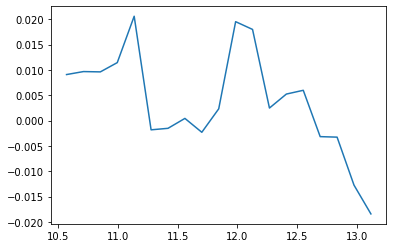

In [13]:
plt.plot(centers, a)

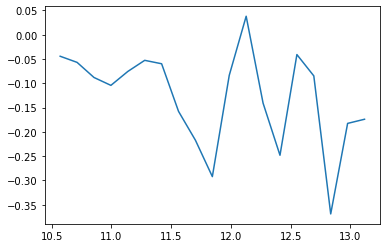

In [14]:
plt.plot(centers, b)

In [15]:
# nbins=10
# bin_plot=100
# edges1=np.percentile(ys, np.linspace(0,100,nbins))
# centers_Ms=(edges1[:-1]+edges1[1:])/2
# sigMs=[]
# ysig_Ms, predsig_Ms = [], []

# ybs, predbs = [], []

# for i in range(len(edges1)-1):
#     mask=np.logical_and(edges1[i]<=ys,edges1[i+1]>=ys)
#     ysig_Ms.append(np.std(ys[mask]-np.mean(ys[mask])))
#     predsig_Ms.append(np.std(pred[mask]))
#     sigMs.append(np.std(pred[mask]-ys[mask]))
    
#     ybs.append(np.mean(ys[mask]))
#     predbs.append(np.mean(pred[mask]))
# #     fig, ax = plt.subplots()
# # #     ax.plot(pred[mask],'o', markersize=2, alpha=0.9, label='Prediction')
# # #     ax.plot(ys[mask],'ro', markersize=2, alpha=0.2, label='True')
# #     tot=np.hstack([pred[mask], ys[mask]])
# #     ax.hist(pred[mask],bins=bin_plot, range=(min(tot), max(tot)),
# #                                                   histtype='step', density=1, label='Prediction')
# #     ax.hist(ys[mask], bins=bin_plot, range=(min(tot), max(tot)),
# #                                      histtype='step', density=1, label='True')
# #     ax.vlines(edges1[i], 0,1, 'k')
# #     ax.vlines(edges1[i+1], 0,1, 'k')
    
# #     ax.set(title=f'Pred sig {np.std(pred[mask]):.3f}, SAM sig {np.std(ys[mask]):.3f}, bin {edges1[i+1]-edges1[i]}')
# #     ax.legend()
    
# sigMs=np.array(sigMs)
# ysig_Ms, predsig_Ms = np.array(ysig_Ms), np.array(predsig_Ms)
# ybs, predbs = np.array(ybs),np.array(predbs)

In [16]:
ys, pred = ys[:,0], pred[:,0]

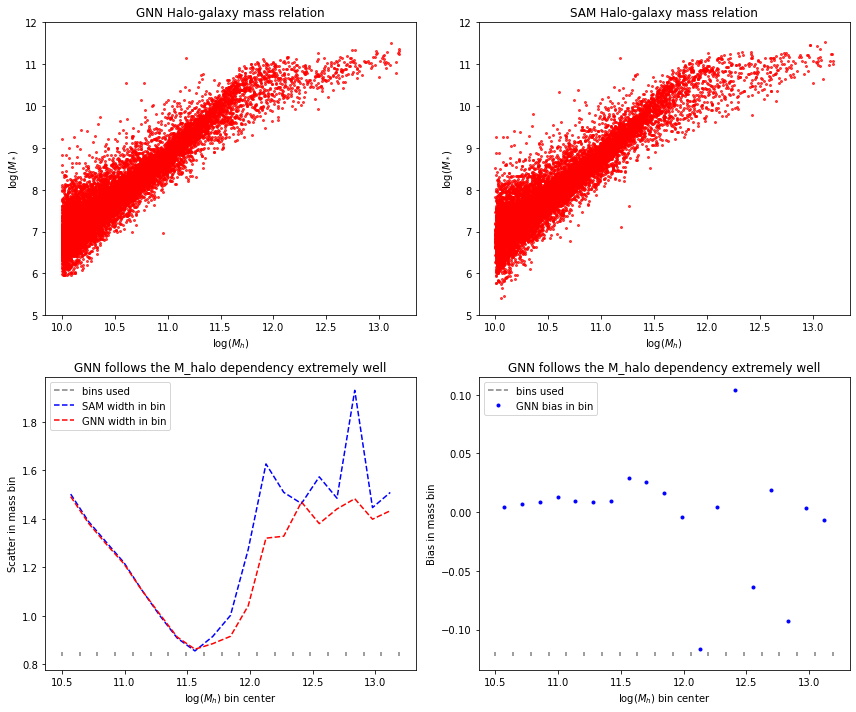

In [17]:
fig, ax =plt.subplots(ncols=2,nrows=2, figsize=(12,10))
ax=ax.flatten()
ax[0].plot(Mhf, pred,'ro', markersize=2, alpha=0.7, label='Prediction')
ax[0].set(xlabel=r'log($M_h$)', ylabel=r'log($M_*$)', title='GNN Halo-galaxy mass relation', ylim=(5,12))
# ax[0].legend(loc='upper left')

ax[1].plot(Mhf, ys,'ro', markersize=2, alpha=0.7, label='True')
ax[1].set(xlabel=r'log($M_h$)', ylabel=r'log($M_*$)', title='SAM Halo-galaxy mass relation', ylim=(5,12))
# ax[1].legend(loc='upper left')

ax[2].vlines(edges, min(predsigs)-0.03, min(predsigs)-0.01, color='gray', linestyle='--', label='bins used')
ax[2].plot(centers, ysigs, 'b--', label='SAM width in bin')
ax[2].plot(centers, predsigs, 'r--', label='GNN width in bin')
ax[2].set(xlabel=r'log($M_h$) bin center', ylabel=r'Scatter in mass bin', title='GNN follows the M_halo dependency extremely well')
ax[2].legend()

ax[3].vlines(edges, min(yb)-0.03/5, min(yb)-0.01/5, color='gray', linestyle='--', label='bins used')
ax[3].plot(centers, yb, 'b.', label='GNN bias in bin')
ax[3].set(xlabel=r'log($M_h$) bin center', ylabel=r'Bias in mass bin', title='GNN follows the M_halo dependency extremely well')
ax[3].legend()

fig.tight_layout()

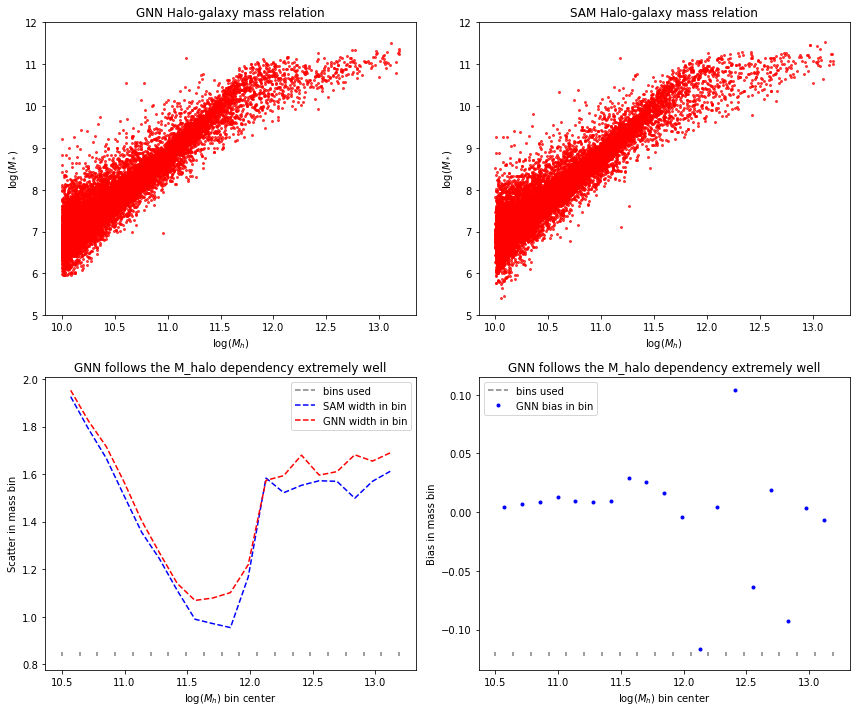

In [18]:
fig, ax =plt.subplots(ncols=2,nrows=2, figsize=(12,10))
ax=ax.flatten()
ax[0].plot(Mhf, pred,'ro', markersize=2, alpha=0.7, label='Prediction')
ax[0].set(xlabel=r'log($M_h$)', ylabel=r'log($M_*$)', title='GNN Halo-galaxy mass relation', ylim=(5,12))
# ax[0].legend(loc='upper left')

ax[1].plot(Mhf, ys,'ro', markersize=2, alpha=0.7, label='True')
ax[1].set(xlabel=r'log($M_h$)', ylabel=r'log($M_*$)', title='SAM Halo-galaxy mass relation', ylim=(5,12))
# ax[1].legend(loc='upper left')

ax[2].vlines(edges, min(predsigs)-0.03, min(predsigs)-0.01, color='gray', linestyle='--', label='bins used')
ax[2].plot(centers, pillai_ys, 'b--', label='SAM width in bin')
ax[2].plot(centers, pillai_gnn, 'r--', label='GNN width in bin')
ax[2].set(xlabel=r'log($M_h$) bin center', ylabel=r'Scatter in mass bin', title='GNN follows the M_halo dependency extremely well')
ax[2].legend()

ax[3].vlines(edges, min(yb)-0.03/5, min(yb)-0.01/5, color='gray', linestyle='--', label='bins used')
ax[3].plot(centers, yb, 'b.', label='GNN bias in bin')
ax[3].set(xlabel=r'log($M_h$) bin center', ylabel=r'Bias in mass bin', title='GNN follows the M_halo dependency extremely well')
ax[3].legend()

fig.tight_layout()

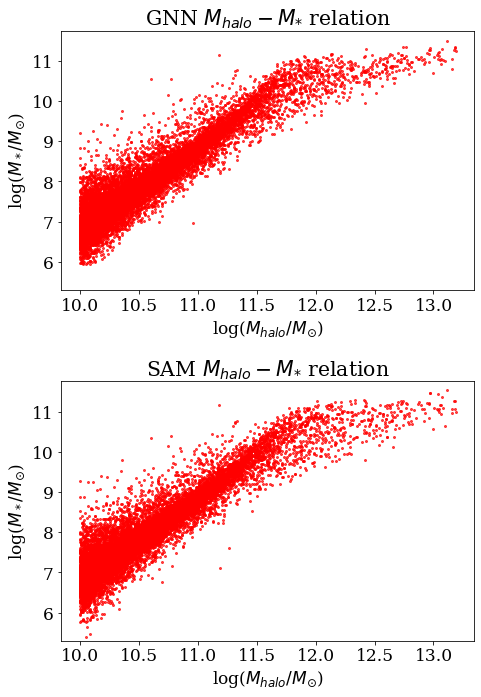

In [19]:
import matplotlib
font = {'family' : 'Serif',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)
fig, ax =plt.subplots(ncols=1,nrows=2, figsize=(7,10))
ax=ax.flatten()
ax[0].plot(Mhf, pred,'ro', markersize=2, alpha=0.7, label='Prediction')
ax[0].set(xlabel=r'log($M_{halo}/M_{\odot}$)', ylabel=r'log($M_*/M_{\odot}$)', title=r'GNN $M_{halo}-M_{*}$ relation', ylim=(5.3,11.75))
# ax[0].legend(loc='upper left')

ax[1].plot(Mhf, ys,'ro', markersize=2, alpha=0.7, label='True')
ax[1].set(xlabel=r'log($M_{halo}/M_{\odot}$)', ylabel=r'log($M_*/M_{\odot}$)', title=r'SAM $M_{halo}-M_{*}$ relation', ylim=(5.3,11.75))
# ax[1].legend(loc='upper left')

fig.tight_layout()
fig.savefig('../paper_figures/GNN_SAM_mh_mstar.png')

NameError: name 'edges1' is not defined

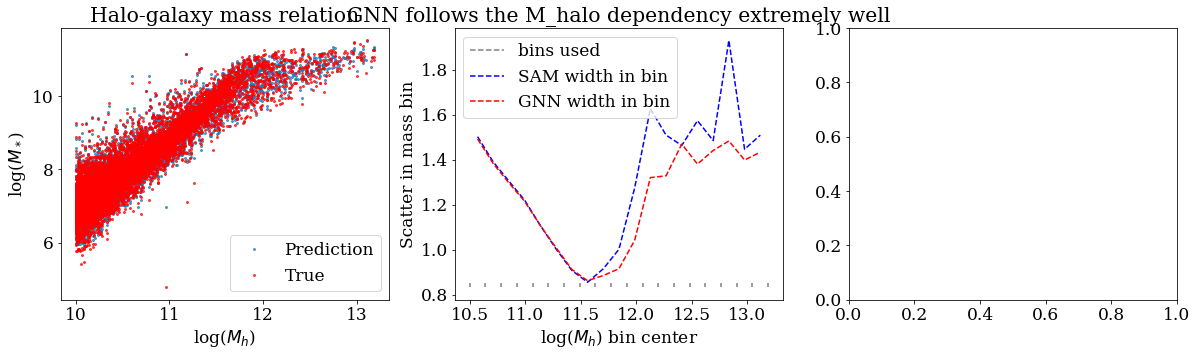

In [20]:
fig, ax =plt.subplots(ncols=3,nrows=1, figsize=(20,5))
ax=ax.flatten()
ax[0].plot(Mhf, pred,'o', markersize=2, alpha=0.7, label='Prediction')
ax[0].plot(Mhf, ys,'ro', markersize=2, alpha=0.7, label='True')
ax[0].set(xlabel=r'log($M_h$)', ylabel=r'log($M_*$)', title='Halo-galaxy mass relation')
ax[0].legend()
ax[1].vlines(edges, min(predsigs)-0.03, min(predsigs)-0.01, color='gray', linestyle='--', label='bins used')
ax[1].plot(centers, ysigs, 'b--', label='SAM width in bin')
ax[1].plot(centers, predsigs, 'r--', label='GNN width in bin')
ax[1].set(xlabel=r'log($M_h$) bin center', ylabel=r'Scatter in mass bin', title='GNN follows the M_halo dependency extremely well')
ax[1].legend()

ax[2].vlines(edges1, min(predsig_Ms)-0.03, min(predsig_Ms)-0.01, color='gray', linestyle='--', label='bins used')
ax[2].plot(centers_Ms, ysig_Ms, 'b--', label='SAM width in bin')
ax[2].plot(centers_Ms, predsig_Ms, 'r--', label='GNN width in bin')
ax[2].set(xlabel=r'log($M_{\odot}$) bin center', ylabel=r'Scatter in stellar mass bin', title='M_stellar is less broad in bins of M_stellar (of course)')
ax[2].legend()

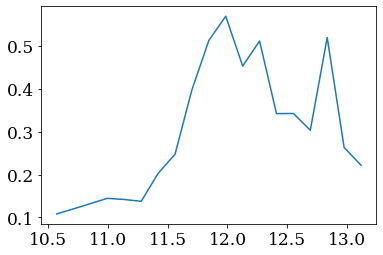

In [21]:
plt.plot( centers, np.array(sigM)/np.array(ysigs))

NameError: name 'centers_Ms' is not defined

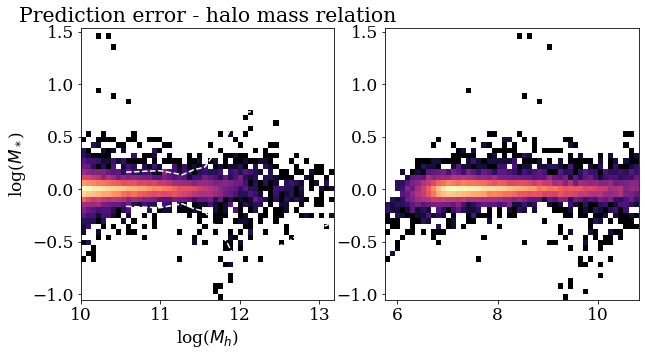

In [22]:
import matplotlib as mpl
bins=50
l=0.02
res=ys.flatten()-pred.flatten()
fig, ax =plt.subplots(ncols=2,nrows=1, figsize=(10,5))
ax=ax.flatten()
ax[0].hist2d(np.array(Mhf), res, bins=bins, range=[np.percentile(Mhf, [0,100]),
            np.percentile(res, [0+l,100-l])], norm=mpl.colors.LogNorm(), cmap=mpl.cm.magma)
ax[0].plot(centers, sigM, 'w--')
ax[0].plot(centers, -sigM, 'w--')

ax[0].set(xlabel=r'log($M_h$)', ylabel=r'log($M_*$)', title='Prediction error - halo mass relation')
# ax[0].legend()
ax[1].hist2d(ys.flatten(), res, bins=bins, range=[np.percentile(ys.flatten(), [l,100-1]),
            np.percentile(res, [0+l,100-l])], norm=mpl.colors.LogNorm(), cmap=mpl.cm.magma)

ax[1].plot(centers_Ms, sigMs, 'w--')
ax[1].plot(centers_Ms, -sigMs, 'w--')

ax[1].set(xlabel=r'log($M_{\odot}$)', 
          ylabel=r'log($M_{\odot, SAM}$)-log($M_{\odot,GNN}$)', 
          title='Prediction error - galaxy mass relation')
# ax[1].legend()
fig.tight_layout()

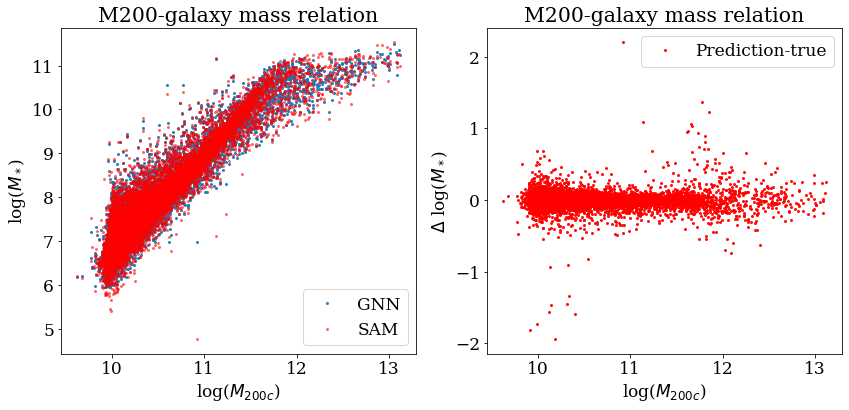

In [23]:
fig, ax =plt.subplots(ncols=2,nrows=1, figsize=(14,6))
ax=ax.flatten()
ax[0].plot(M200, pred,'o', markersize=2, alpha=0.9, label='GNN')
ax[0].plot(M200, ys,'ro', markersize=2, alpha=0.5, label='SAM')
ax[0].set(xlabel=r'log($M_{200c}$)', ylabel=r'log($M_*$)', title='M200-galaxy mass relation')
ax[0].legend()
ax[1].plot(M200, pred-ys,'ro', markersize=2, alpha=0.9, label='Prediction-true')
ax[1].set(xlabel=r'log($M_{200c}$)', ylabel=r'$\Delta$ log($M_*$)', title='M200-galaxy mass relation')
ax[1].legend()

In [25]:
Y=np.log10(np.array(r_vir)/np.array(rs_klypin)) #should be r_200/rs

In [35]:
r_vir

[478.807,
 77.991,
 292.724,
 50.067,
 48.632,
 76.881,
 48.773,
 97.591,
 44.273,
 58.355,
 46.453,
 185.204,
 140.875,
 115.023,
 110.987,
 63.0,
 77.75,
 80.105,
 87.533,
 85.386,
 54.367,
 83.944,
 80.914,
 76.071,
 76.75,
 71.325,
 72.498,
 71.199,
 64.51,
 50.314,
 69.341,
 53.589,
 59.936,
 65.99,
 56.877,
 63.038,
 60.405,
 61.699,
 51.709,
 56.851,
 59.72,
 58.454,
 57.13,
 47.452,
 56.663,
 56.981,
 53.735,
 44.681,
 46.328,
 55.547,
 52.75,
 53.659,
 55.041,
 53.81,
 53.799,
 51.041,
 50.989,
 52.158,
 52.593,
 51.791,
 51.81,
 49.702,
 48.653,
 46.383,
 44.213,
 46.477,
 47.881,
 47.586,
 47.347,
 45.653,
 44.99,
 45.197,
 44.613,
 45.032,
 46.321,
 45.933,
 44.247,
 44.823,
 76.67,
 83.868,
 64.087,
 48.731,
 215.639,
 220.853,
 47.242,
 129.456,
 67.121,
 92.573,
 61.295,
 54.515,
 111.173,
 77.345,
 53.641,
 99.275,
 94.222,
 93.758,
 69.32,
 61.304,
 91.513,
 91.177,
 81.144,
 74.644,
 85.053,
 83.599,
 80.068,
 78.463,
 72.242,
 72.151,
 49.298,
 71.043,
 70.98,
 71.12

In [26]:
nbins=20
edges=np.percentile(Y, np.linspace(0,100,nbins))
# edges=np.linspace(, max(Mhf),nbins)
centers=(edges[:-1]+edges[1:])/2
deltay=[]
deltapred=[]

for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<Y,edges[i+1]>=Y)
    deltay.append(np.mean(ys[mask]-np.median(ys[mask])))
    deltapred.append(np.mean(pred[mask]-np.median(pred[mask])))
    

In [27]:
deltay 

[0.31151488,
 0.29124522,
 0.25588045,
 0.27425113,
 0.2642397,
 0.2518733,
 0.25198618,
 0.25308955,
 0.22574334,
 0.24300215,
 0.19459371,
 0.16474992,
 0.16697164,
 0.13292089]

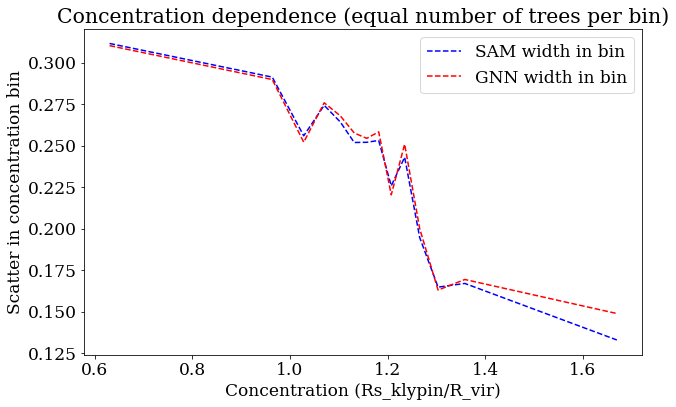

In [28]:
fig, ax =plt.subplots(ncols=1,nrows=1, figsize=(10,6))
# ax=ax.flatten()
# ax.vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
ax.plot(centers, deltay, 'b--', label='SAM width in bin')
ax.plot(centers, deltapred, 'r--', label='GNN width in bin')
ax.set(xlabel=r'Concentration (Rs_klypin/R_vir)', ylabel=r'Scatter in concentration bin', 
       title='Concentration dependence (equal number of trees per bin)')
ax.legend()

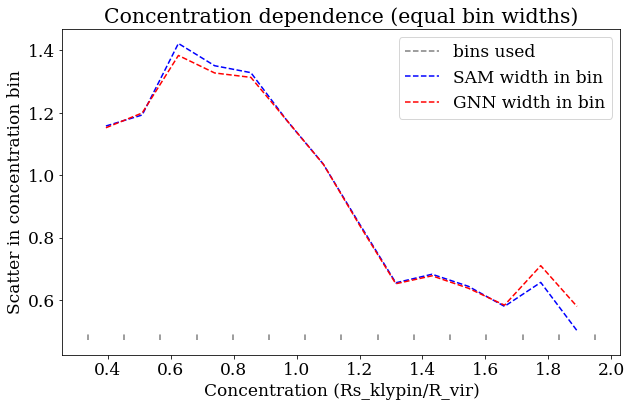

In [29]:
edges=np.linspace(min(Y), max(Y), nbins)
centers=(edges[:-1]+edges[1:])/2
deltay=[]
deltapred=[]

for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<Y,edges[i+1]>=Y)
    deltay.append(np.std(ys[mask]-np.mean(ys[mask])))
    deltapred.append(np.std(pred[mask]-np.mean(pred[mask])))
fig, ax =plt.subplots(ncols=1,nrows=1, figsize=(10,6))
# ax=ax.flatten()
ax.vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
ax.plot(centers, deltay, 'b--', label='SAM width in bin')
ax.plot(centers, deltapred, 'r--', label='GNN width in bin')
ax.set(xlabel=r'Concentration (Rs_klypin/R_vir)', ylabel=r'Scatter in concentration bin', 
       title='Concentration dependence (equal bin widths)')
ax.legend()

In [31]:
nbins=20
# edges=np.percentile(Mhf[Mhf>10.5], np.linspace(0,100,nbins))
edges=np.linspace(min(Mhf), max(Mhf),nbins)
centers=(edges[:-1]+edges[1:])/2
res_y = []
res_pred = []
Ys = []
for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<=Mhf,edges[i+1]>=Mhf)
    res_y.append(ys[mask]-np.median(ys[mask]))
    res_pred.append(pred[mask]-np.median(pred[mask]))
    Ys.append(Y[mask])
    
res_y = np.hstack(res_y).flatten()
res_pred = np.hstack(res_pred).flatten()
Ys = np.hstack(Ys)

In [32]:
# len(Ys[-1]), len(res_y[-1])

In [33]:
np.hstack(Ys), 

(array([1.5509917 , 1.3701746 , 1.3197232 , ..., 0.94064695, 1.0542192 ,
        0.603886  ], dtype=float32),)

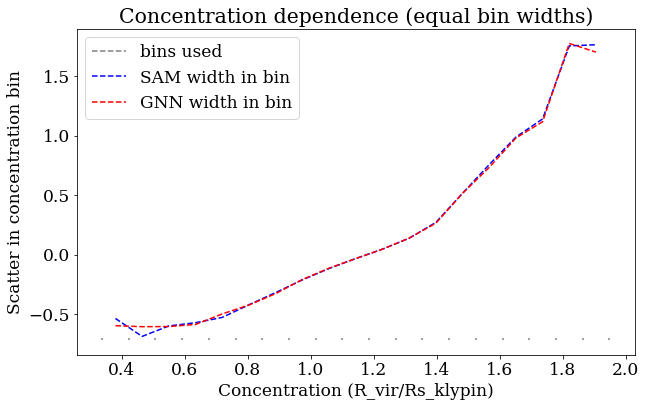

In [34]:
edges=np.linspace(min(Ys), max(Ys), nbins)
centers=(edges[:-1]+edges[1:])/2
deltay=[]
deltapred=[]
for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<Ys,edges[i+1]>=Ys)
    deltay.append(np.median(res_y[mask]))
    deltapred.append(np.median(res_pred[mask]))
fig, ax =plt.subplots(ncols=1,nrows=1, figsize=(10,6))
# ax=ax.flatten()
ax.vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
ax.plot(centers, deltay, 'b--', label='SAM width in bin')
ax.plot(centers, deltapred, 'r--', label='GNN width in bin')
ax.set(xlabel=r'Concentration (R_vir/Rs_klypin)', ylabel=r'Scatter in concentration bin', 
       title='Concentration dependence (equal bin widths)')
ax.legend()

(69.205986, 5.4793086)

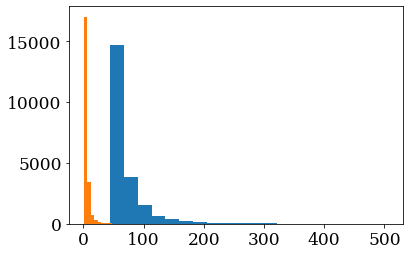

In [40]:
plt.hist(r_vir, bins=20)
plt.hist(rs_klypin, bins=20)
np.mean(r_vir), np.mean(rs_klypin)

(array([1.800e+01, 1.300e+01, 4.500e+01, 8.800e+01, 1.580e+02, 3.410e+02,
        6.330e+02, 1.242e+03, 2.506e+03, 4.116e+03, 4.968e+03, 3.821e+03,
        2.114e+03, 9.950e+02, 3.980e+02, 1.920e+02, 7.500e+01, 2.400e+01,
        1.100e+01, 4.000e+00]),
 array([-0.8628969 , -0.7823416 , -0.7017862 , -0.62123084, -0.5406755 ,
        -0.46012017, -0.37956482, -0.29900947, -0.21845412, -0.13789877,
        -0.05734342,  0.02321193,  0.10376728,  0.18432263,  0.26487797,
         0.34543332,  0.42598867,  0.506544  ,  0.5870994 ,  0.66765475,
         0.7482101 ], dtype=float32),
 <BarContainer object of 20 artists>)

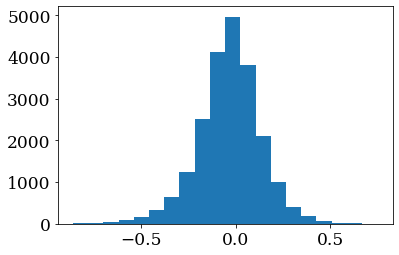

In [39]:
plt.hist(np.log10(np.array(r_vir)/np.array(rs_klypin))-1.2, bins=20)

In [44]:
len(d[0])

43